In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [2]:
# Loading the data from CSV file to pandas dataframe
df=pd.read_csv("D:\Py_Practice\Medical cost prediction\insurance.csv")

# 1) Understanding dataset

Data Exploration

In [3]:
# First 10 rows of the dataframe
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Last 10 rows of the dataframe
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


Categorical Features:
    Sex,
    Smoker,
    Region

In [5]:
# Number of rows and columns in dataframe
df.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Checking null values in each columns
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# All columns of the dataframe
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# Number of unique value in each columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
print(f"The minimum insurance charges: {df['charges'].min()} Rupees")
print(f"The average insurance charge : {df['charges'].mean()} Rupees")
print(f"The maximum insurance charges: {df['charges'].max()} rupees")

The minimum insurance charges: 1121.8739 Rupees
The average insurance charge : 13270.422265141257 Rupees
The maximum insurance charges: 63770.42801 rupees


# 2) Cleaning the data

In [11]:
# Checking duplicates
df.duplicated().sum()

1

In [12]:
# Checking which data is duplicate
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
# Removing duplicate data
df.drop_duplicates(inplace=True)

In [14]:
# Checking duplicate data
df.duplicated().sum()

0

In [15]:
# Checking the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [16]:
# number of values for each categories
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [17]:
# number of values for each categories
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [18]:
# number of values for each categories
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [19]:
# number of values for each categories
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [20]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


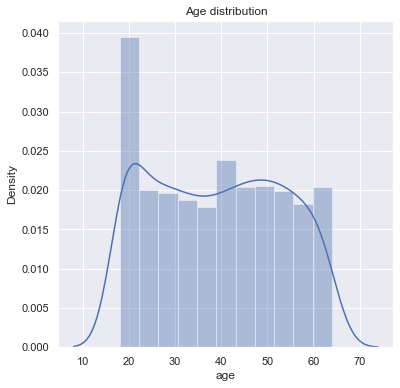

In [21]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6)) # 6 inches X 6 inches
sns.distplot(df['age']) #A Distplot or distribution plot, depicts the variation in the data distribution.
plt.title("Age distribution")
plt.show()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


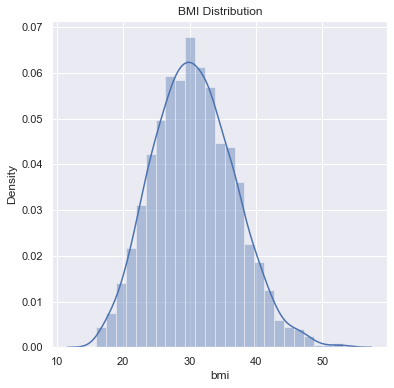

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

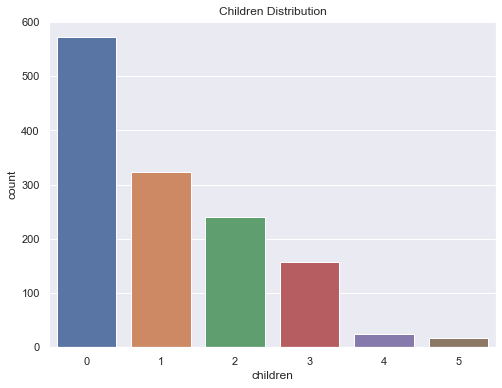

In [23]:
sns.set()
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=df) 
#countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.title("Children Distribution")
plt.show()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


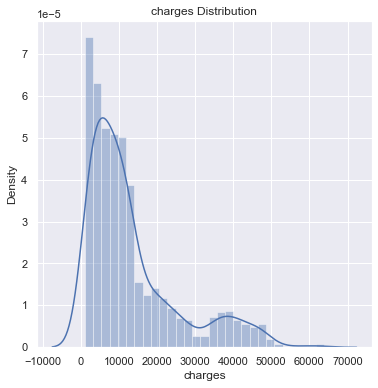

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charges Distribution")
plt.show()

Countplot for categorical data we can't plot this type of distribution for categorical data

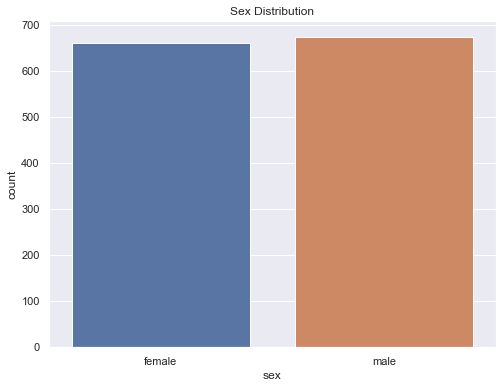

male      675
female    662
Name: sex, dtype: int64

In [25]:
# Gender distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df)
plt.title("Sex Distribution")
plt.show()
df['sex'].value_counts()

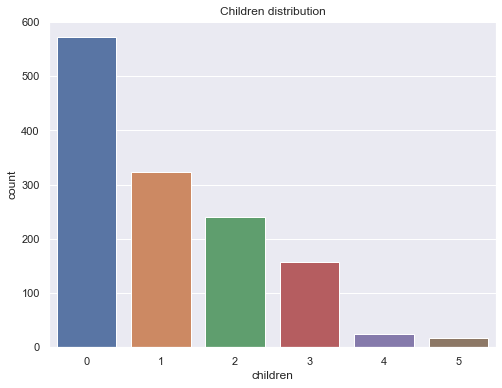

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
# Children distribution
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=df)
plt.title("Children distribution")
plt.show()
df['children'].value_counts()

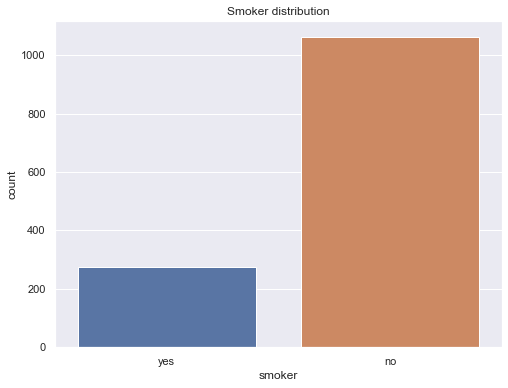

no     1063
yes     274
Name: smoker, dtype: int64

In [27]:
# Smoker distribution
plt.figure(figsize=(8,6))
sns.countplot(x='smoker',data=df)
plt.title("Smoker distribution")
plt.show()
df['smoker'].value_counts()

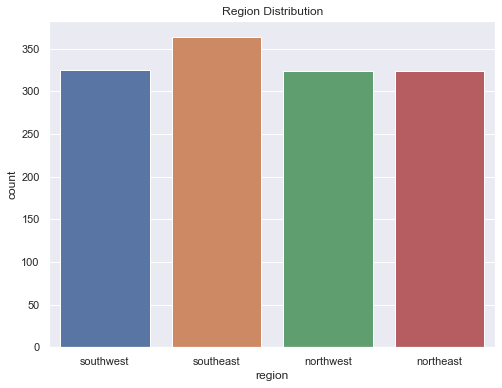

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [28]:
# Region distribution
plt.figure(figsize=(8,6))
sns.countplot(x='region',data=df)
plt.title("Region Distribution")
plt.show()
df['region'].value_counts()

Data Pre-processing

Encoding the categorical features

In [29]:
# Encoding Sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
# inplace=True is write to return copy of the object with the operation is performed.
# Encoding Smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region column
df.replace({'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}},inplace=True)

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [31]:
# Spliting the Features & Target
X=df.drop('charges',axis=1) # axis=1:to removing particular column & axis=0:to removing particular row
y=df['charges']

In [32]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,3
1,18,0,33.770,1,1,2
2,28,0,33.000,3,1,2
3,33,0,22.705,0,1,1
4,32,0,28.880,0,1,1


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Spiliting the data into Training and Testing Data

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


Model Training :-- Linear Regression

In [36]:
# Loading the Linear Regression model
regr= LinearRegression()

In [37]:
regr.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [38]:
# prediction on training data
train_data_pred=regr.predict(X_train)

In [39]:
# R squared value
r2_train=metrics.r2_score(y_train,train_data_pred)
print(f"R squared value for Training data : {r2_train}") # r2_score value for checking performance of our model

R squared value for Training data : 0.7498685351780441


In [40]:
#  prediction on Testing data
test_data_pred=regr.predict(X_test)

In [41]:
# R squared value
r2_test=metrics.r2_score(y_test,test_data_pred)
print(f"R squared value for Testing data:{r2_test}")

R squared value for Testing data:0.747697175007436


Building a predictive system

In [42]:
print("Enter data in the sequence given below:")
print("[age,sex,bmi,children,smoker,region]")
input_data=(60,1,36.005,0,1,0)
print(input_data)

# Changing input_data into numpy array
input_data_as_array=np.asarray(input_data)

# Reshape the array
input_data_reshaped=input_data_as_array.reshape(1,-1)

# (1,-1), -1 here : every elements will be columns and 1 means: 1 row
# (-1,1), -1 here: every elements will be rows  and 1 means: 1 column

#Prediction
prediction=regr.predict(input_data_reshaped)
print(f"The Predicted medical insurance cost is :{prediction} Rupees")

Enter data in the sequence given below:
[age,sex,bmi,children,smoker,region]
(60, 1, 36.005, 0, 1, 0)
The Predicted medical insurance cost is :[15303.06213561] Rupees


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
correlation=df.corr()

<AxesSubplot:>

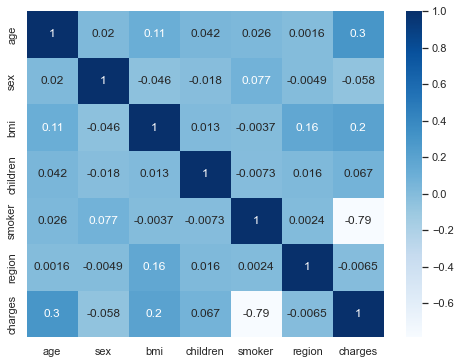

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='Blues')

In [46]:
df=df.to_csv("D:\\Py_Practice\\Medical cost prediction\\Updated_insurance.csv")